In [31]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import holoviews
import pygraphviz
import networkx as nx
import pandas as pd
import matplotlib.patches as mpatches
from scipy import stats

In [32]:
import pylab as pyl

In [33]:
class LRinfos:  
    """
    class to handle  Natmi dataframe results
    one object by result ! 
    to create object, predf is needed (the Edges opened with pandas csv)
    use 'frame' attribute to get dataframe suitable for graph conversion
    """
    def __init__(self, age, day, predf):
        self.age = age
        self.day = day
        self.predf  = predf
        self.makeunique_symbo_cellty()
        self.about = f"object age {age}, day {day}, use 'frame' attribute for more!"
        
    def makeunique_symbo_cellty(self):
        otab = self.predf
        otab['uniq_Ligand_symbol'] = otab['Ligand symbol'] + '_' + otab['Sending cluster']
        otab['uniq_Receptor_symbol'] = otab['Receptor symbol'] + '_' + otab['Target cluster']
        self.frame = otab       
           

In [34]:
ages = [ 'Young', 'Old']
days = ['D0', 'D2', 'D4', 'D7']     

<div class="alert alert-info">
  <strong>Network files : </strong>
    <p></p>
     These tab delimited dataframe files are named identically, see variable: 
      <p style="font-family:'Lucida Console', monospace">deffilename</p>
        So, what distinguishes Networks is folder location, folder location has age and day !!!
</div> 

In [35]:
"""
Network files are named identically (deffilename) , BUT : 
what distinguishes Networks is folder location, folder location has age and day !!!
"""
indatadir = "~/BulkAnalysis_plusNetwork/natmiOut/"
outdir =  "~/BulkAnalysis_plusNetwork/graphobs/"
print(os.getcwd())
deffilename = 'Network_exp_0_spe_0_det_0.6_top_0_signal_lrc2p_weight_mean/'

# example opening a file: 
old_D7 = pd.read_csv(f'{indatadir}OldD7/{deffilename}Edges.csv',sep=",", header=0) 
old_D7.head(1)

/home/johanna/BulkAnalysis_plusNetwork/graphmodeling


,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand detection rate,Ligand average expression value,Ligand derived specificity of average expression value,Receptor detection rate,Receptor average expression value,Receptor derived specificity of average expression value,Edge average expression weight,Edge average expression derived specificity
0,FAPs,Agt,Mas1,ECs,1.0,1.761114,0.927754,1.0,0.793632,0.17806,1.397677,0.165196


In [36]:
"""
all LRinfos objects are stocked in dictionnary
"""
lr = {}      
for i in ages:
    lr[i] = {}
    for j in days:   
        predf = pd.read_csv(f'{indatadir}{i}{j}/{deffilename}Edges.csv',sep=",", header=0)  
        myob = LRinfos(i, j, predf)
        lr[i][j] = myob      

In [37]:
print(lr['Young']['D2'].about)

object age Young, day D2, use 'frame' attribute for more!


In [39]:
lr['Young']['D2'].frame.head(1)

,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand detection rate,Ligand average expression value,Ligand derived specificity of average expression value,Receptor detection rate,Receptor average expression value,Receptor derived specificity of average expression value,Edge average expression weight,Edge average expression derived specificity,uniq_Ligand_symbol,uniq_Receptor_symbol
0,sCs,Agt,Mas1,ECs,1.0,0.544434,0.757238,1.0,0.595223,0.32514,0.32406,0.246209,Agt_sCs,Mas1_ECs


In [97]:
max(lr['Old']['D0'].frame['Edge average expression derived specificity'])

1.0

In [98]:
ttmp = lr['Old']['D0'].frame
filterere = ttmp.loc[ttmp['Ligand average expression value'] > 100]

In [99]:
def filterOutZeroEdges(mypandasdf):
    return

((8038, 14), (758, 14))


In [ ]:
for age in ages:
    for day in days:
        tmptofilt = lr[age][day].frame
        

Text(0.5, 0.98, 'Edge specificities, log10 (x +1e-15)')

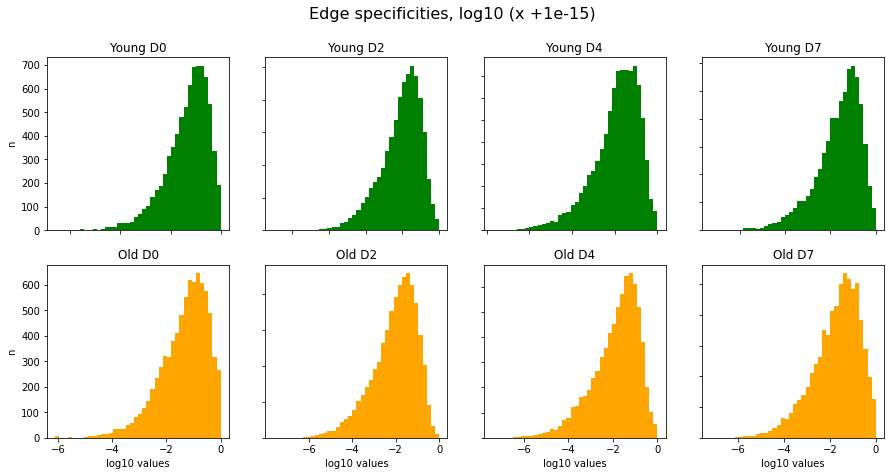

In [82]:
""" plotting edge specificities """
num_added = 0.000000000000001
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
histocols = ['green','orange']
fig, axs = plt.subplots(2, 4, figsize=(15,7))
for rawi in range(2):
    AGE = ages[rawi]
    for coli in range(4):
        DAY = days[coli]
        tmpvec = lr[AGE][DAY].frame['Edge average expression derived specificity']        
        axs[rawi, coli].hist(np.log10(np.array(tmpvec)+num_added),
                            color=histocols[rawi], bins=40)
        axs[rawi, coli].set_title(f'{ages[rawi]} {days[coli]}')
        

for ax in axs.flat:
    ax.set(xlabel='log10 values', ylabel='n')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.suptitle(f'Edge specificities, log10 (x +{num_added})', fontsize=16)

The closer to 1 (0 in log10 value) the more the edge is predicted to be 'specific'
We see that most of edges specificities are concentrated between 0.1 and 0.001 (-1 and -3 in log10 value). 
These plots allowed us to know about data distribution, but we need
to scale them to  values suitable for making graph style visualizations.

Text(0.5, 0.98, 'Edge specificities, XXXX (x etc')

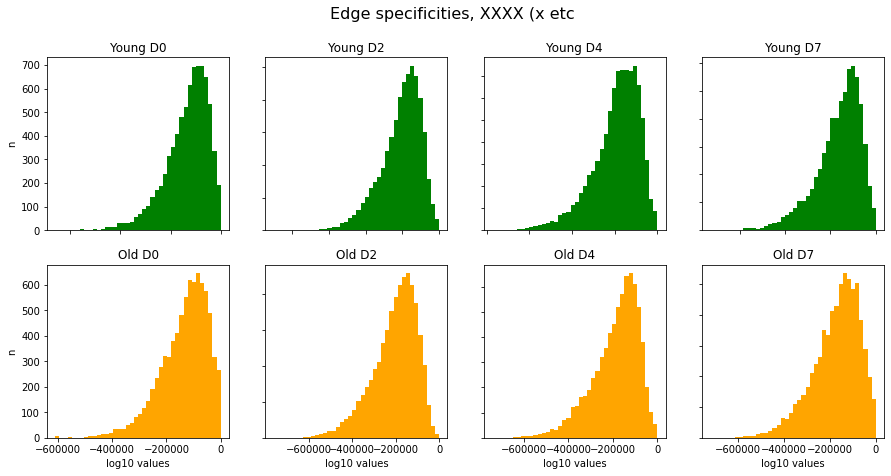

In [96]:
""" plotting scaled edge specificities """

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
histocols = ['green','orange']
fig, axs = plt.subplots(2, 4, figsize=(15,7))
for rawi in range(2):
    AGE = ages[rawi]
    for coli in range(4):
        DAY = days[coli]
        tmpvec = lr[AGE][DAY].frame['Edge average expression derived specificity']        
        axs[rawi, coli].hist(np.log10(np.array(tmpvec)+num_added)*100000,
                            color=histocols[rawi], bins=40)
        axs[rawi, coli].set_title(f'{ages[rawi]} {days[coli]}')
        

for ax in axs.flat:
    ax.set(xlabel='log10 values', ylabel='n')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.suptitle(f'Edge specificities, XXXX (x etc', fontsize=16)